## Medida de centralidade e dispersão

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
from zipfile import ZipFile

#Lendo a base de dados
caminho = "/content/drive/MyDrive/Bootcamp Alura/Módulo 03/Arquivos/dados/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [3]:
#Calculando o IMC
#É necessário converter a altura de cm para m
dados["IMC"] = dados["VB17003"] / ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [4]:
#Criando as classes do IMC

'''
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

Bin values into discrete intervals.
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable 
For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins

include_lowestbool, default False
Whether the first interval should be left-inclusive or not
'''

classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo", "normal", "sobrepeso", "obesidade"]

dados["CLASSE_IMC"] = pd.cut(x = dados["IMC"], bins = classes, labels = labels, include_lowest = True)

dados[["IMC", "CLASSE_IMC"]]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [5]:
#Calculando a média - Altura
dados["VB17004"].mean()

160.71311307078818

In [6]:
#Calculando a média seperando por gênero - Altura
dados.groupby("VB01001")["VB17004"].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [7]:
#Calculando a moda - Altura
dados["VB17004"].mode()

0    160.0
dtype: float64

In [8]:
#Calculando a média da altura separando por gênero e idade 
dados.groupby(["VB01001", "VB01003"])["VB17004"].mean().round(2)

VB01001  VB01003
1        11         147.62
         12         153.70
         13         160.72
         14         166.41
         15         170.34
         16         172.42
         17         173.81
         18         173.02
         19         172.14
2        11         149.52
         12         154.97
         13         157.67
         14         159.34
         15         160.76
         16         160.39
         17         160.91
         18         159.44
         19         158.98
Name: VB17004, dtype: float64

### Desafio 01: Fazer a descrição de outras variáveis, analisar e compartilhar as análises no Discord

In [9]:
dados.select_dtypes(include="float64")

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO,IMC
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235,15.051321
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081,21.727839
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235,18.502907
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081,23.322831
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235,28.122076
...,...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539,20.113223
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440,17.930782
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512,23.968489
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091,18.995343


### Desafio 02: Fazer o calculo da média por sexo e idade, através do CrossTab

In [10]:
#Calculando a média da altura separando por gênero e idade 
media_altura = pd.crosstab(dados["VB01003"], dados["VB01001"], values=dados["VB17004"], aggfunc="mean").round(2) 
media_altura.rename(columns = {1: 'Masculino', 2: 'Feminino'}, inplace = True)
media_altura.rename_axis("Idade", axis=0, inplace = True)
media_altura.rename_axis("Sexo", axis=1, inplace = True)
media_altura

Sexo,Masculino,Feminino
Idade,,
11,147.62,149.52
12,153.70,154.97
13,160.72,157.67
14,166.41,159.34
15,170.34,160.76
16,172.42,160.39
17,173.81,160.91
18,173.02,159.44
19,172.14,158.98


### Super-desafio 01: Criar um dicionário para facilitar a busca da pergunta

In [11]:
#Lendo os dados do Dicionário PeNSE
dicionario = pd.read_excel("/content/drive/MyDrive/Bootcamp Alura/Módulo 03/Arquivos/dados/Dicionario_PENSE_Microdados_AMOSTRA2.xls")

In [12]:
#Criando a função para criar um dicionário com as respostas
def cria_dicionario_respostas(cod_pergunta: str, dicionario = dicionario):
  '''
  Esta função cria um dicionario com as respostas a partir do código da pergunta

  Parâmetros: 
    cod_pergunta: string com o código da pergunta
    dicionario: DataFrame com os dados do arquivo "Dicionario_PENSE_Microdados_AMOSTRA2.xls"
  
  Retorna:
   dicionario_respostas: dicionário contendo o código da pergunta, a pergunta e as respostas possíveis
  '''

  #Fazendo a query
  busca = dicionario.query(f"VARIÁVEL == '{cod_pergunta}'")

  #Selecionando o índice da pergunta 
  indice_pergunta = (busca.index).tolist()[0]

  #Criando um dicionário para as respostas possíveis
  respostas = {}

  #Enquanto não encontro o código da próxima pergunta
  indice = indice_pergunta + 1

  while True:

    valor = dicionario.loc[indice]["VARIÁVEL"]

    #Para corrigir a ocorrência de "0 a 2999"
    if type(valor) is int or valor.replace(" a ", "").isnumeric():

      #Adicionando as variáveis e as alternativas de resposta ao dicionário
      nova_linha = {int(valor) : dicionario.iloc[indice]["QUESTIONÁRIO DO ALUNO"]}

      #Atualizando o dicionário com a nova linha
      respostas.update(nova_linha)

      indice += 1
    
    else:
      break
  
  return {"Código da pergunta": cod_pergunta, "Pergunta": dicionario.iloc[indice_pergunta, 1], "Respostas": respostas}

In [13]:
cria_dicionario_respostas("VB11003")

{'Código da pergunta': 'VB11003',
 'Pergunta': 'NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso? ',
 'Respostas': {1: 'Sim', 2: 'Não', 99: 'Não informado'}}

### Super-desafio 02: De alguma maneira sumarizar as perguntas para ficar mais curta (NLTK, GESIM)

**Solução baseada no trabalho do colega @alcarnielo**

Fonte: https://medium.com/@viniljf/utilizando-processamento-de-linguagem-natural-para-criar-um-sumariza%C3%A7%C3%A3o-autom%C3%A1tica-de-textos-775cb428c84e

In [14]:
#Importando as bibliotecas
import nltk

#Fazendo o download necessário
nltk.download(["averaged_perceptron_tagger", "floresta", "mac_morpho", "machado", "punkt", "stopwords", "wordnet", "words"])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Unzipping corpora/floresta.zip.
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [15]:
#Selecionando as linhas de interesse
#Para corrigir a ocorrência de "0 a 2999"
dicionario = dicionario[dicionario["VARIÁVEL"] != "0 a 2999"]

dicionario_pense = dicionario[dicionario["VARIÁVEL"].apply(type) != type("str")]
dicionario_pense = dicionario[dicionario["VARIÁVEL"].str.len() > 3].reset_index(drop=True)

#Para retirar as stopwords da lista de palavras: 
from nltk.corpus import stopwords
from string import punctuation
stopwords = set(stopwords.words("portuguese") + list(punctuation))

#Criando o dicionário simplificado
dicionario_pense_simplificado = {}

#Selecionando as variáveis
vars = dicionario_pense["VARIÁVEL"]

for i, var in enumerate(vars):

    #Selecionando o texto
    texto = dicionario_pense.loc[i, "QUESTIONÁRIO DO ALUNO"]

    #Dividindo o texto em sentenças e depois em palavras
    sentencas = nltk.sent_tokenize(texto)
    palavras = nltk.word_tokenize(texto.lower())

    #Retirando as stopwords da lista de palavras
    palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords]

    #Armazenando o texto sem stopwords na variável "texto_simplificado"
    texto_simplificado = " ".join(palavras_sem_stopwords)

    #Adicionando o texto simplificado ao dicionário
    dicionario_pense_simplificado[var] = texto_simplificado

dicionario_pense_simplificado

{'ANOPESQ': 'ano pesquisa realizada',
 'ESTRATOGEOREG': 'indicador estrato georeg',
 'ESTRATO_EXP': 'expressão estrato',
 'PAIS': 'país',
 'PESO': 'peso aluno acordo amostra utilizado expansão',
 'REGEOGR': 'região geográfica',
 'TEMPODESLOC': 'refere-se tempo médio diário acumulado escolar deslocamento casa escola escola casa feito pé bicicleta últimos sete dias anteriores pesquisa minutos',
 'TEMPOEDFIS': 'refere-se tempo médio acumulado últimos sete dias anteriores pesquisa escolar fez atividade física esporte durante aulas educação física escola minutos',
 'TEMPOEST': 'atividade física globalmente estimada refere-se número dias escolares declararam fazer menos hora dia atividade física sete dias anteriores pesquisa minutos',
 'TEMPOEXTRA': 'refere-se tempo médio diário acumulado escolar prática alguma atividade física extraescolar esportes dança ginástica musculação lutas outra atividade últimos sete dias anteriores data pesquisa minutos',
 'TEMPOTOTAL': 'atividade física acumulada

### Nuvem de palavras

A título de aprendizado, aproveitando a ideia do colega Marcelo Oliveira:

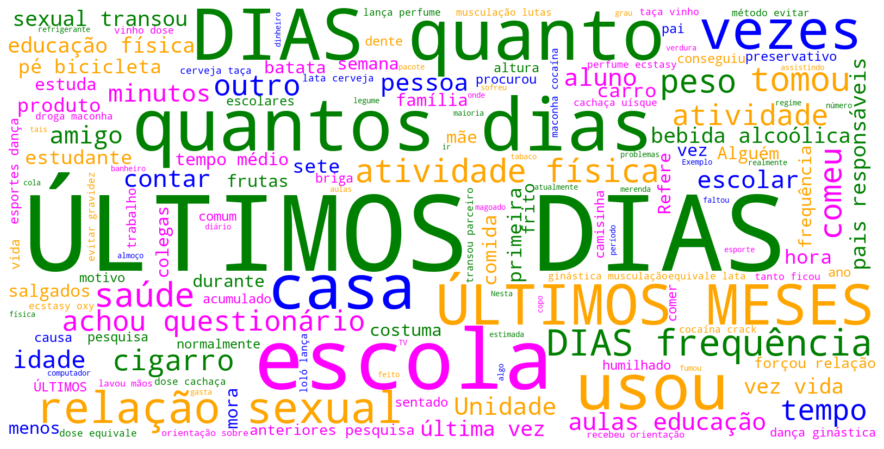

In [16]:
#Importando as bibliotecas
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Removendo as linhas que apresentam dados ausentes
dicionario_pense.dropna(subset=["QUESTIONÁRIO DO ALUNO"], axis=0, inplace = True)

#Atribuindo a coluna "QUESTIONÁRIO DO ALUNO" a uma variável chamada "questionario"
questionario = dicionario_pense["QUESTIONÁRIO DO ALUNO"]

#Para a realização de um wordcloud em python é necessário que todas as palavras estejam juntas, todas contidas em apenas uma string

#Colocando todas as linhas em apenas uma string e separadas por um espaço " "
questionario_juntas = " ".join(q for q in questionario)

#Existem algumas palavras que não contidas neste conjunto da biblioteca, 
#sendo assim, as principais palavras não contidas no conjunto serão atribuídas à variável "stopwords"

#Retirando as stopwords
stopwords = nltk.corpus.stopwords.words("portuguese")
adiciona_stopwords = ["qual", "você", "?", ")", "(", "quantas", "fez", "fazer", "porque", "ter", "tipo", "fazendo", "outra", "todo", "outras", "alguma", "etc", "algum"]
stopwords = stopwords + adiciona_stopwords

#Definindo o mapa de cores
cmap = ListedColormap (["blue", "magenta", "green", "orange"])

#Gerando a nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=150, colormap=cmap, width=1600, height=800).generate(questionario_juntas)

#Gerando a imagem
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()

### Continuando a aula...

In [17]:
#Calculando a média do salário na Alura
salario_thiago = 9000
salario_allan = 1000
salario_medio_ds_alura = (salario_thiago+salario_allan)/2
salario_medio_ds_alura

5000.0

In [18]:
#Calculando a média da altura
media_altura =  dados["VB17004"].mean()
dados["MEDIA_ALTURA"] = media_altura

diferenca_das_medias = dados["VB17004"] - media_altura
dados["DIFERENCA_MEDIA"] = diferenca_das_medias

diferenca_quadrado = diferenca_das_medias**2
dados["DIFERENCA_QUADRADO"] = diferenca_quadrado

dados[["VB17004", "MEDIA_ALTURA", "DIFERENCA_MEDIA", "DIFERENCA_QUADRADO"]]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [19]:
#Calculando a variância
dados["DIFERENCA_QUADRADO"].mean() #Em centímetros quadrados

106.9105945368652

In [20]:
variancia_amostral = (1/(len(dados)-1)) * dados["DIFERENCA_QUADRADO"].sum()
variancia_amostral #Em centímetros quadrados

106.91705244049119

In [21]:
#Calculando a média da altura
dados["VB17004"].mean() #Em centímetros

160.71311307078818

In [22]:
#Calculando o desvio padrão
desvio_padrao = np.sqrt(variancia_amostral)
desvio_padrao

10.340070233827776

### Desafio 03: Estudar as medidas de dispersão e calcular utilizando o pandas <br> Realizar os cálculos para as outras colunas numéricas

**Medidas de Dispersão**

As medidas de dispersão são medidas que indicam o quão espalhados os dados estão, ou como eles variam. São elas a amplitude, a variância, o desvio padrão e o desvio absoluto.

- Amplitude
>A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados. Para fazer este cálculo no Pandas, utiliza-se as funções max() e min(), que obviamente, retornam o valor máximo e mínimo de um conjunto de dados, e depois subtrai-se um do outro.
- Variância
>A variância é uma medida que expressa quanto os dados de um conjunto estão afastados de seu valor esperado. A variância é calculada no Pandas através da função var().
- Desvio Padrão
>O desvio padrão também é uma medida de dispersão, que indica quanto os dados estão afastados da média. Um valor de desvio padrão alto indica que os valores estão mais espalhados, mais longe da média, e um desvio padrão baixo indica que os valores estão mais próximos da média. No Pandas, o cálculo é feito através da função std().
- Desvio Médio Absoluto
>O desvio médio absoluto é a média das distâncias entre cada dado e a média. Ele nos dá uma noção da variabilidade em um conjunto de dados e é calculado da seguinte forma: primeiro, encontra-se a média dos valores; depois, calcula-se a distância entre cada dado e a média usando distâncias positivas (isso é o que chamamos de desvios absolutos); soma-se as distâncias e dividi-se a soma pelo número de dados. No Pandas, a função mad() faz este cálculo.

https://felipegalvao.com.br/pt/blog/descriptive-statistics-with-python/

In [23]:
#Selecionando as colunas do tipo "float64"
dados.select_dtypes(include="float64")

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO,IMC,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235,15.051321,160.713113,-3.713113,13.787209
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081,21.727839,160.713113,-8.713113,75.918339
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235,18.502907,160.713113,0.686887,0.471814
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081,23.322831,160.713113,11.786887,138.930703
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235,28.122076,160.713113,6.786887,46.061834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539,20.113223,160.713113,7.186887,51.651344
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440,17.930782,160.713113,25.086887,629.351896
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512,23.968489,160.713113,-1.313113,1.724266
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091,18.995343,160.713113,-2.913113,8.486228


Variável: ALTURA

In [24]:
#Calculando a média da altura
dados["VB17004"].mean()

160.71311307078818

In [25]:
#Calculando a variância amostral da altura
dados["VB17004"].var()

106.9170524404917

In [26]:
#Calculando o desvio padrão da altura
dados["VB17004"].std()

10.3400702338278

In [27]:
#Calculado o desvio médio absoluto da altura
dados["VB17004"].mad()

8.279193574009849

Variável: PESO

In [28]:
cria_dicionario_respostas("VB17003")

{'Código da pergunta': 'VB17003',
 'Pergunta': 'Peso do estudante, incluindo os imputados, com uma casa decimal ',
 'Respostas': {}}

In [29]:
#Calculando a média do peso
dados["VB17003"].mean()

54.70558105822677

In [30]:
#Calculando a variância amostral do peso
dados["VB17003"].var()

211.64035060768379

In [31]:
#Calculando o desvio padrão do peso
dados["VB17003"].std()

14.547864125282576

In [32]:
#Calculado o desvio médio absoluto do peso
dados["VB17003"].mad()

10.986241387923256

Variável: IMC

In [33]:
#Calculando a média do IMC
dados["IMC"].mean()

20.95825220663186

In [34]:
#Calculado o desvio médio absoluto do IMC
dados["IMC"].mad()

3.18584316077019

In [35]:
#Calculando o desvio padrão do IMC
dados["IMC"].std()

4.244441438911331

In [36]:
#Calculando a variância amostral do IMC
dados["IMC"].var()

18.015283128347697